# Recurrent Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1 - Data Preprocessing

In [2]:
# Predicting Stock Prices

### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set= dataset_train.iloc[:,1:2].values

### Feature Scaling

In [6]:
# STandardization and Normalisation

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [9]:
X_train =[]
y_train =[]
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train= np.array(X_train), np.array(y_train)

In [10]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [13]:
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))

In [14]:
#3D np arrays with stock prices, time interval and no of indicators

In [16]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [18]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50,return_sequences=True, input_shape=(X_train.shape[1], 1)))
#dropout regularisation
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50,return_sequences=False))
regressor.add(Dropout(0.2))

### Adding the output layer

In [28]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [30]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [32]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 116ms/step - loss: 0.0357
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0039
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [33]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price= dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [35]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [40]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

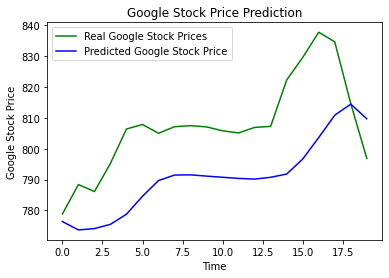

In [43]:
plt.plot(real_stock_price, color= 'green', label ='Real Google Stock Prices')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [44]:
import math
from sklearn.metrics import mean_squared_error
rmse= math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [46]:
rmse = rmse/100
rmse

0.19977516275238244

In [49]:
# We get a decent root mean squared error value of 0.19 considering how 
# tough it is to predict stock prices :)